In [6]:
from gal4H0 import *
import pickle
from scipy.integrate import cumtrapz
import scipy

In [7]:
def combine_H0(data_struct,ev_idx):
    pos_single=np.log(data_struct['single_pos'][ev_idx,:])
    combined=np.sum(pos_single,axis=0)
    combined-=combined.max()
    combined=np.exp(combined)
    combined/=np.trapz(combined,data_struct['H0_grid'])
    return combined

def H0convergence(data_struct,Nevents,Nrep,CI=90.):
    out=np.zeros([Nrep,len(Nevents)])
    for i,Nev in enumerate(Nevents):
        for j in range(Nrep):
            comb=combine_H0(data_struct,np.random.permutation(20000)[:Nev:])
            H0samp=np.random.choice(data_struct['H0_grid'],size=1000,replace=True,p=comb/comb.sum())
            mm=np.median(H0samp)
            tt,bb=np.percentile(H0samp,50+0.5*CI),np.percentile(H0samp,50-0.5*CI)
            out[j,i]=(tt-bb)/70.
    return out

def H0convergence_2(data_struct,Nevents,Nrep,CI=90.):
    out=np.zeros([Nrep,len(Nevents)])
    
    for i,Nev in enumerate(Nevents):
        for j in range(Nrep):
            comb=combine_H0(data_struct,np.random.permutation(20000)[:Nev:])
            H0samp=np.random.choice(data_struct['H0_grid'],size=1000,replace=True,p=comb/comb.sum())
            mm=np.mean(H0samp)
            out[j,i]=(70.-mm)/np.std(H0samp)
    
    return out



## Convergence plots

Below we load the simulations with a large number of GW detections and we calculate convergence plots.

In [8]:
Narr=np.array([100,500,1000,2000])
data=pickle.load(open('high_Ndet_data/LOS_451_20perc_highN.p','rb'))
data['single_pos']=np.vstack(data['single_pos'])
out451=H0convergence(data,Narr,100,CI=68.3)
data=pickle.load(open('high_Ndet_data/LOS_455_20perc_highN.p','rb'))
data['single_pos']=np.vstack(data['single_pos'])
out455=H0convergence(data,Narr,100,CI=68.3)

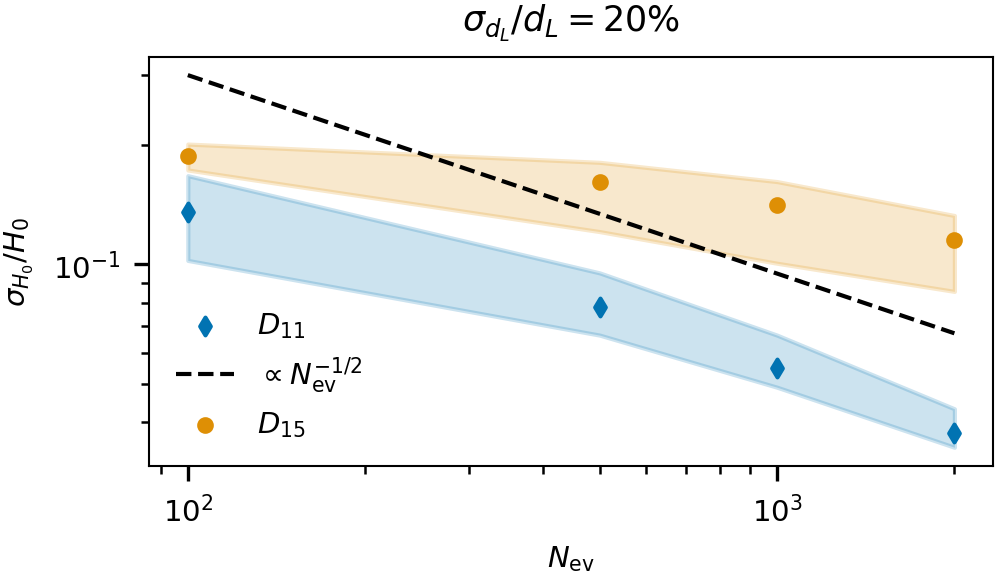

In [9]:
plt.figure(figsize=(3.5,2.1))
plt.fill_between(Narr,np.percentile(out451,5,axis=0),np.percentile(out451,95,axis=0),alpha=0.2,color=pal[0])
plt.scatter(Narr,np.median(out451,axis=0),color=pal[0],marker='d',label=r'$D_{11}$')

plt.plot(Narr,3*(Narr**-0.5),ls='--',color='k',label=r'$\propto N_{\rm ev}^{-1/2}$')

plt.fill_between(Narr,np.percentile(out455,5,axis=0),np.percentile(out455,95,axis=0),alpha=0.2,color=pal[1])
plt.scatter(Narr,np.median(out455,axis=0),color=pal[1],marker='o',label=r'$D_{15}$')

plt.legend(frameon=False)
plt.title(r'$\sigma_{d_L}/d_L=20\%$')
plt.ylabel(r'$\sigma_{H_0}/H_0$')
plt.xlabel(r'$N_{\rm ev}$')
plt.tight_layout()

plt.yscale('log')
plt.xscale('log')
plt.savefig('figures_paper/H0_convergence.pdf')

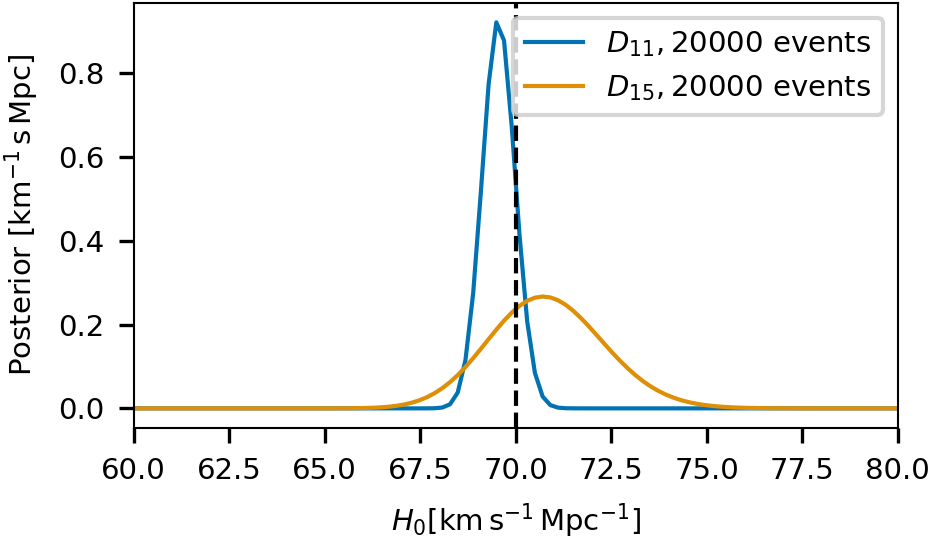

In [5]:
plt.figure(figsize=(3.3,2.0))
data=pickle.load(open('high_Ndet_data/LOS_451_20perc_highN.p','rb'))
data['single_pos']=np.vstack(data['single_pos'])
comb=combine_H0(data,np.random.permutation(20000))
plt.plot(data['H0_grid'],comb,color=pal[0],label=r'$D_{11}, 20000$ events')

data=pickle.load(open('high_Ndet_data/LOS_455_20perc_highN.p','rb'))
data['single_pos']=np.vstack(data['single_pos'])
comb=combine_H0(data,np.random.permutation(20000))
plt.plot(data['H0_grid'],comb,color=pal[1],label=r'$D_{15}, 20000$ events')

plt.legend()
plt.xlim([60,80])
plt.xlabel(r'$H_0 {\rm[km \,s^{-1} \,Mpc^{-1}]}$')
plt.ylabel(r'Posterior ${\rm[km^{-1} \,s \,Mpc]}$')
plt.axvline(70.,ls='--',color='k')
plt.tight_layout()

plt.savefig('figures_paper/20kevents.pdf')

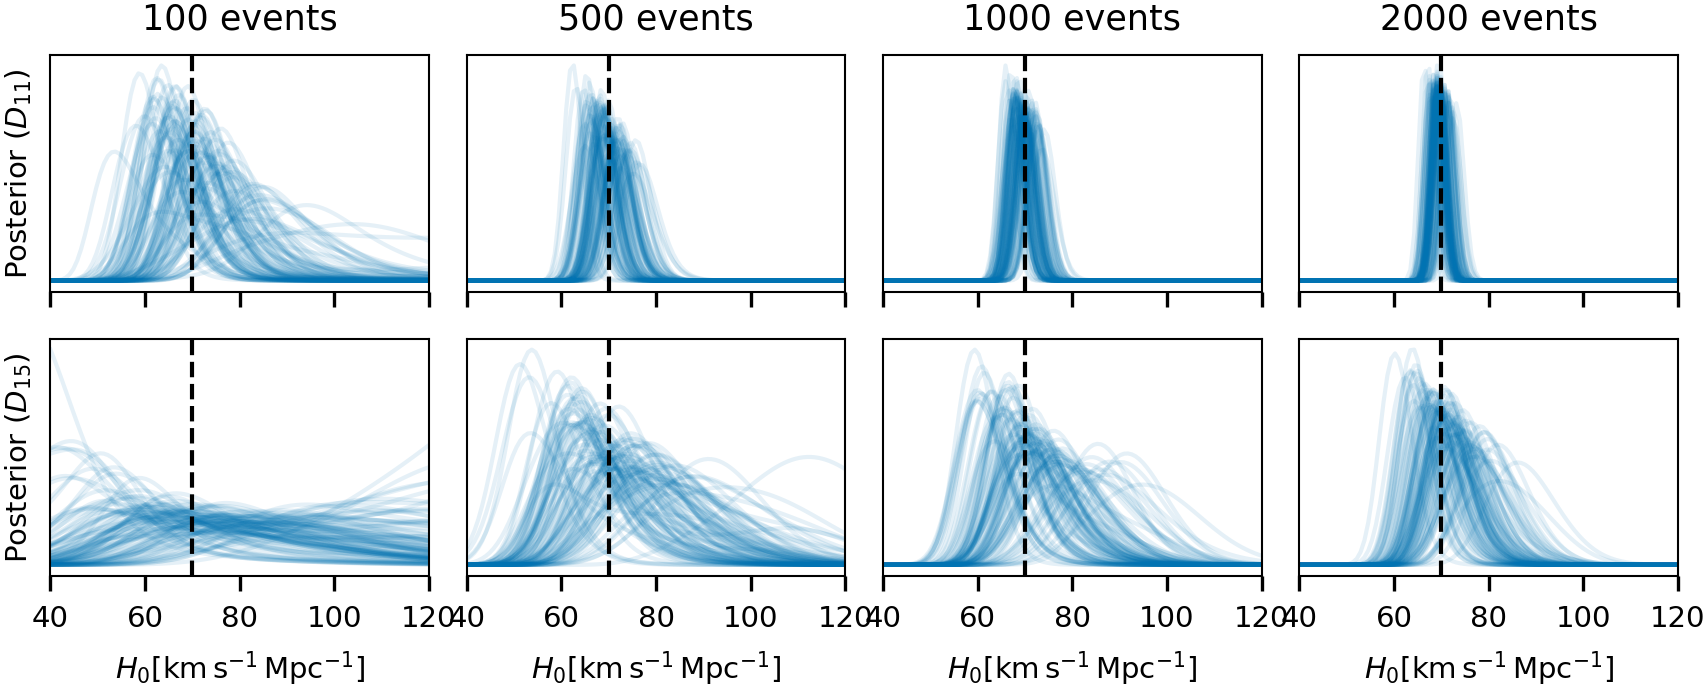

In [34]:
fig,ax=plt.subplots(2,4,sharex=True,figsize=(7.0,2.3))
Nrep=100
Narr=np.array([100,500,1000,2000])

data=pickle.load(open('high_Ndet_data/LOS_451_20perc_highN.p','rb'))
data['single_pos']=np.vstack(data['single_pos'])


for i,Nev in enumerate(Narr):
    for j in range(100):
        comb=combine_H0(data,np.random.permutation(20000)[:Nev:])
        ax[0,i].plot(data['H0_grid'],comb,alpha=0.1,color=pal[0])
    ax[0,i].axvline(70.,ls='--',color='k')
    ax[0,i].yaxis.set_ticklabels([])
    ax[0,i].yaxis.set_ticks([])
    ax[0,i].set_title(str(Nev)+' events')
    ax[0,i].set_xlim([40,120])

data=pickle.load(open('high_Ndet_data/LOS_455_20perc_highN.p','rb'))
data['single_pos']=np.vstack(data['single_pos'])


for i,Nev in enumerate(Narr):
    for j in range(100):
        comb=combine_H0(data,np.random.permutation(20000)[:Nev:])
        ax[1,i].plot(data['H0_grid'],comb,alpha=0.1,color=pal[0])
    ax[1,i].axvline(70.,ls='--',color='k')
    ax[1,i].yaxis.set_ticklabels([])
    ax[1,i].yaxis.set_ticks([])
    ax[1,i].set_xlim([40,120])

for i,Nev in enumerate(Narr):
    ax[1,i].set_xlabel(r'$H_0 {\rm[km \,s^{-1} \,Mpc^{-1}]}$')
    
ax[0,0].set_ylabel(r'Posterior ($D_{11}$)')
ax[1,0].set_ylabel(r'Posterior ($D_{15}$)')

fig.subplots_adjust(wspace=0.1)
plt.savefig('figures_paper/H0_realizations.pdf')


    

## PP-plots

Below we load 100 simulations with H0 injected uniofrm in 40-120 km/s/Mpc and we check if the Bayesian framework is working

In [10]:
def pp_curve_2(CI,H0_posteriors,H0_grid,H0_truths,plotsigma=False,Nevents=None):
    Nrep=len(H0_posteriors['single_pos'])
    
    if Nevents is None:
        Nevents=H0_posteriors['single_pos'][0].shape[0]

    ci_fall=np.zeros(Nrep)    
    for i in range(Nrep):
        pos_single=np.log(H0_posteriors['single_pos'][i])
        combined=np.sum(pos_single[:Nevents:],axis=0)
        combined-=combined.max()
        combined=np.exp(combined)
        combined/=np.trapz(combined,H0_grid)
        cdf=cumtrapz(combined,H0_grid)
        interpocdf=interp1d(H0_grid[:-1:],cdf,bounds_error=False,fill_value=(0,1))
        ci_fall[i]=interpocdf(H0_truths[i])
        
    ppplot=np.zeros_like(CI)
    
    for i in range(len(CI)):
        ppplot[i]=len(np.where(ci_fall<=CI[i])[0])/Nrep
    
    if plotsigma:
        for ci, alpha in zip([0.68, 0.95, 0.997],[0.1,0.15,0.2]):
            edge_of_bound = (1. - ci) / 2.
            lower = scipy.stats.binom.ppf(1 - edge_of_bound, Nrep, CI) / Nrep
            upper = scipy.stats.binom.ppf(edge_of_bound, Nrep, CI) / Nrep
            lower[0] = 0
            upper[0] = 0
            plt.fill_between(CI, lower, upper, alpha=alpha, color='k')
    return ppplot

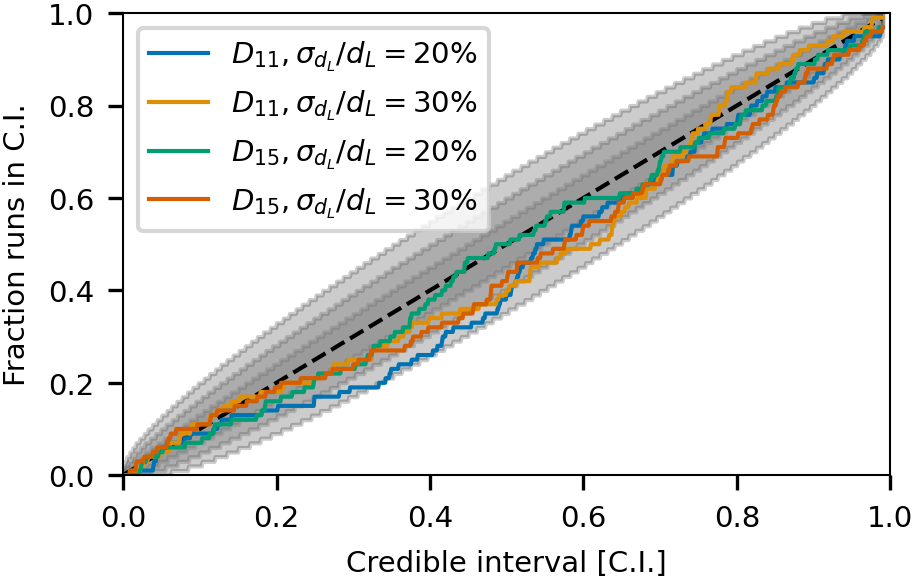

In [11]:
plt.figure(figsize=(3.3,2.0))

CI=np.linspace(0,0.99,1001)
plt.plot(CI,CI,ls='--',color='k')

singlepos=pickle.load(open('ppplots_data/LOS_451_20perc.p','rb'))
ppplot=pp_curve_2(CI,singlepos,singlepos['H0_grid'],singlepos['true_H0'],plotsigma=True,Nevents=200)
plt.plot(CI,ppplot,color=pal[0],label=r'$D_{11}, \sigma_{d_L}/d_L=20\%$')

singlepos=pickle.load(open('ppplots_data/LOS_451_30perc.p','rb'))
ppplot=pp_curve_2(CI,singlepos,singlepos['H0_grid'],singlepos['true_H0'],plotsigma=False,Nevents=200)
plt.plot(CI,ppplot,color=pal[1],label=r'$D_{11}, \sigma_{d_L}/d_L=30\%$')

singlepos=pickle.load(open('ppplots_data/LOS_455_20perc.p','rb'))
ppplot=pp_curve_2(CI,singlepos,singlepos['H0_grid'],singlepos['true_H0'],plotsigma=False,Nevents=200)
plt.plot(CI,ppplot,color=pal[2],label=r'$D_{15}, \sigma_{d_L}/d_L=20\%$')

singlepos=pickle.load(open('ppplots_data/LOS_455_30perc.p','rb'))
ppplot=pp_curve_2(CI,singlepos,singlepos['H0_grid'],singlepos['true_H0'],plotsigma=False,Nevents=200)
plt.plot(CI,ppplot,color=pal[3],label=r'$D_{15}, \sigma_{d_L}/d_L=30\%$')

plt.legend()
plt.xlabel(r'Credible interval [C.I.]')
plt.ylabel(r'Fraction runs in C.I.')
plt.xlim([0,1])
plt.ylim([0,1])

#plt.tight_layout()
plt.savefig('figures_paper/ppplot_photo.pdf')


